# Bank Customer Churn

### Prepared by Shiva Azizzadeh

### Date 2024-03-05

# Goal of Analysis:

The objective of this analysis is to investigate the determinants of customer churn within the bank. Through an examination of diverse features including customer demographics, financial characteristics, and behavioral tendencies, the aim is to construct a predictive model that can pinpoint the primary factors contributing to customer churn. This analysis endeavors to reveal insights that can aid in customer retention efforts and enhance overall customer satisfaction.

# Variables:

1. **RowNumber**: Sequential number assigned to each row.
2. **CustomerId**: Unique ID for each customer.
3. **Surname**: Last name of the customer.
4. **CreditScore**: Numeric value representing the customer's credit score.
5. **Geography**: Categorical variable indicating the customer's geographic location.
6. **Gender**: Categorical variable representing the customer's gender.
7. **Age**: Numeric value indicating the customer's age.
8. **Tenure**: Number of years the customer has been associated with the bank.
9. **Balance**: Numeric value representing the customer's account balance.
10. **NumOfProducts**: Number of bank products/services used by the customer.
11. **HasCrCard**: Binary variable indicating if the customer has a credit card (1 for yes, 0 for no).
12. **IsActiveMember**: Binary variable indicating if the customer is an active bank member (1 for yes, 0 for no).
13. **EstimatedSalary**: Estimated salary of the customer.
14. **Exited**: Binary variable indicating if the customer churned (left the bank) (1 for yes, 0 for no).
15. **Complain**: Binary variable indicating if the customer has lodged a complaint (1 for yes, 0 for no).
16. **Satisfaction Score**: Customer satisfaction score (if available).
17. **Card Type**: Type of credit card (if applicable).
18. **Point Earned**: Points earned by the customer through bank transactions or programs.






In [307]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

<a id="1"></a> <br>
## Step 1 : Reading and Understanding the Data

In [308]:
# Uploading the train_dataset
df = pd.read_csv("Customer-Churn-Records.csv")

In [309]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0,0,5,GOLD,425


In [310]:
# shape of the data
df.shape

(10000, 18)

In [311]:
# Columns of dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [312]:
def inforamation(df):
    df_information= pd.concat([df.dtypes, df.isna().sum(),df.nunique(),df.mean(),df.median()], axis=1, keys=['Data types','Number of Missing', 'Number of uique values','Average','Median'])
    return(df_information)

In [313]:
inforamation(df)

,Data types,Number of Missing,Number of uique values,Average,Median
RowNumber,int64,0,10000,5000.5000,5000.5000
CustomerId,int64,0,10000,15690940.5694,15690738.0000
Surname,object,0,2932,NaN,NaN
CreditScore,int64,0,460,650.5288,652.0000
Geography,object,0,3,NaN,NaN
Gender,object,0,2,NaN,NaN
Age,int64,0,70,38.9218,37.0000
Tenure,int64,0,11,5.0128,5.0000
Balance,float64,0,6382,76485.8893,97198.5400
NumOfProducts,int64,0,4,1.5302,1.0000


In [314]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [315]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


<a id="2"></a> <br>
## Step 2: Cleaning the Data

In [316]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.0000,0.0042,0.0058,0.0008,-0.0065,-0.0091,0.0072,0.0006,0.0120,-0.0060,-0.0161,-0.0170,0.0093,0.0024
CustomerId,0.0042,1.0000,0.0053,0.0095,-0.0149,-0.0124,0.0170,-0.0140,0.0017,0.0153,-0.0062,-0.0073,-0.0009,-0.0131
CreditScore,0.0058,0.0053,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0268,-0.0270,-0.0126,0.0001
Age,0.0008,0.0095,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853,0.2835,-0.0009,0.0022
Tenure,-0.0065,-0.0149,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0137,-0.0130,0.0087,-0.0102
Balance,-0.0091,-0.0124,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1186,0.1191,-0.0026,0.0146
NumOfProducts,0.0072,0.0170,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0476,-0.0464,-0.0114,-0.0153
HasCrCard,0.0006,-0.0140,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0070,-0.0071,-0.0002,-0.0110
IsActiveMember,0.0120,0.0017,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1564,-0.1547,0.0102,-0.0050
EstimatedSalary,-0.0060,0.0153,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0125,0.0125,-0.0137,-0.0015


We need to do some basic cleansing activity in order to feed our model the correct data as the correlation is low.

In [317]:
# Removing the columns not useful for dataset
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [318]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0,0,5,GOLD,425


In [319]:
# Checking missing values
missing_values=pd.DataFrame(df.isna().sum()).reset_index()
missing_values=missing_values.rename(columns={'index':'column',0:"no_of_missing_values"})
missing_values


,column,no_of_missing_values
0,CreditScore,0
1,Geography,0
2,Gender,0
3,Age,0
4,Tenure,0
5,Balance,0
6,NumOfProducts,0
7,HasCrCard,0
8,IsActiveMember,0
9,EstimatedSalary,0


In [320]:
# Checking missing values
df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [321]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

In [322]:
df.duplicated().sum()

0

<a id="3"></a> <br>
## Step 3: Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable `exited`.

In [323]:
# Percentage of customer churn or stayed in the bank
total_customers = len(df)
churned_count = df[df['Exited'] == 1]['Exited'].count()
not_churned_count = df[df['Exited'] == 0]['Exited'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.38%
Percentage of customers who did not churn: 79.62%


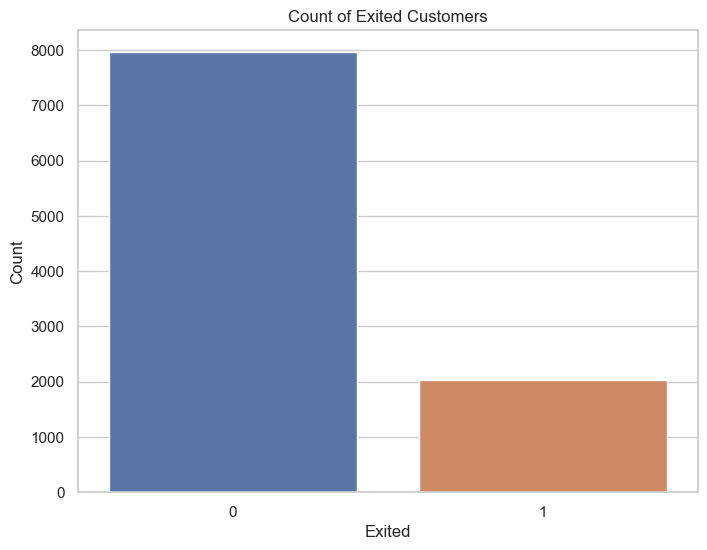

In [324]:
sns.set(style="whitegrid")  

# Plotting a bar plot for the 'Exited' column
plt.figure(figsize=(8, 6))  
sns.countplot(data=df, x='Exited')  
plt.title('Count of Exited Customers')  
plt.xlabel('Exited')  
plt.ylabel('Count')  
plt.show()  

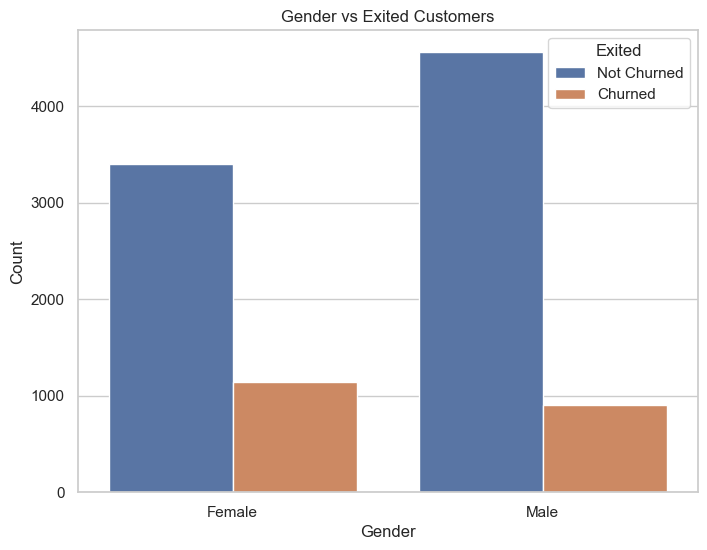

In [325]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs Exited Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Female customers exhibit a higher tendency to churn the bank compared to male customers.


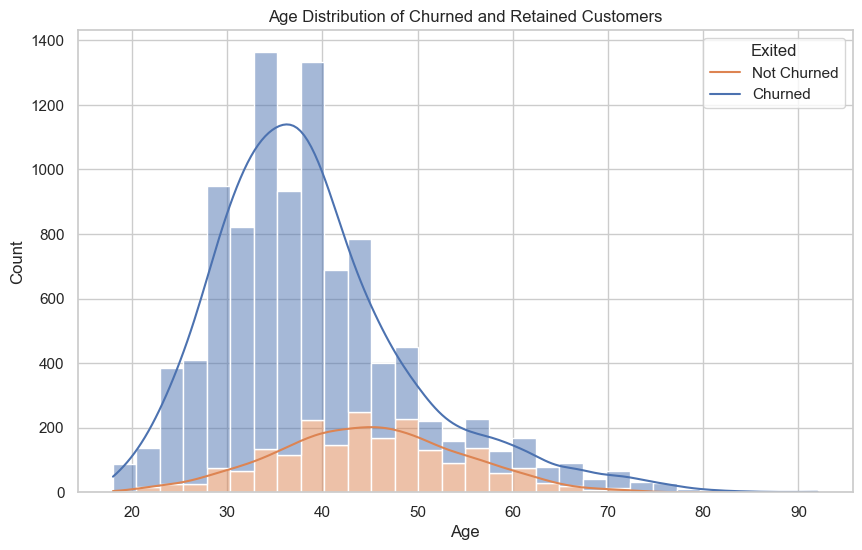

In [326]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Exited', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**Insight:** The age distribution of churned individuals appears right-skewed, indicating that the probability of older individuals not churning is higher.


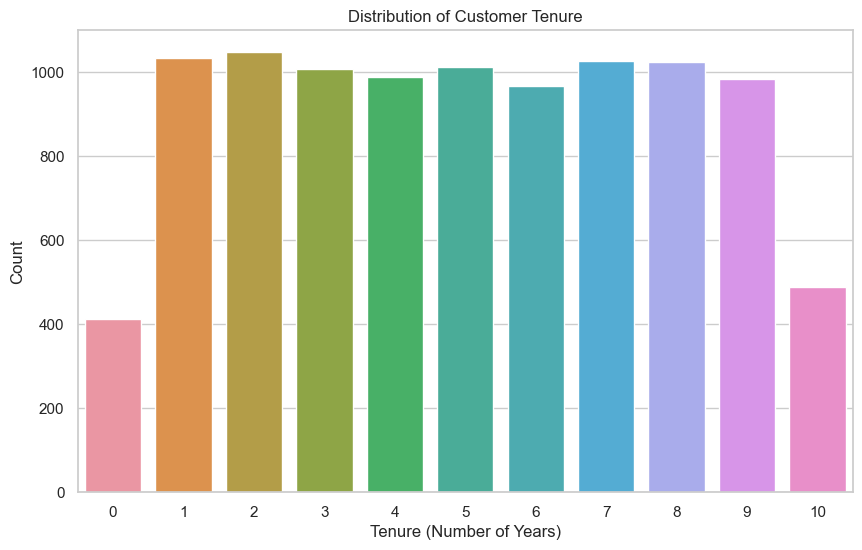

In [327]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tenure')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Count')
plt.show()


In [328]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

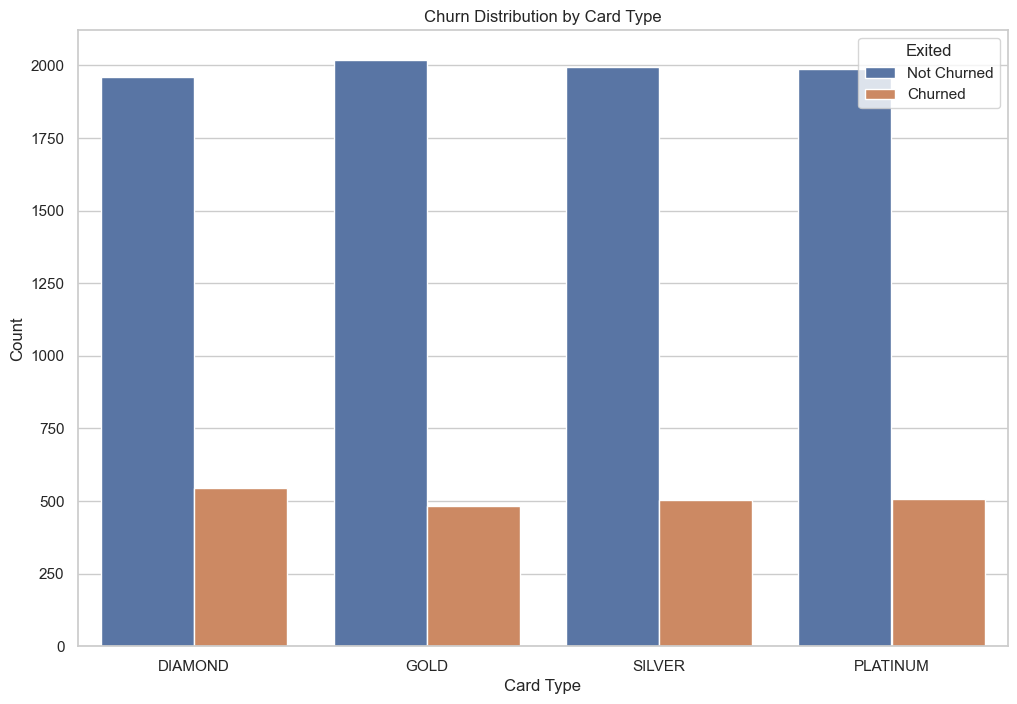

In [329]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Card Type', hue='Exited', order=['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'])
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**Insight:** There appears to be no significant effect of Card Type on customer churn or retention.

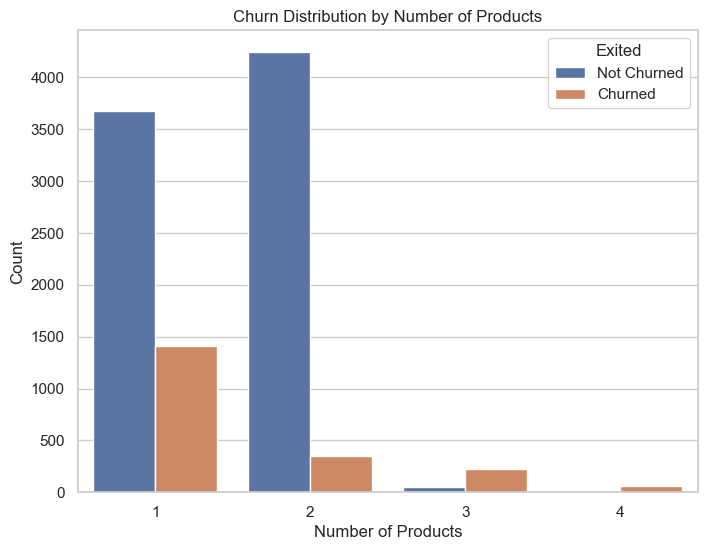

In [330]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Churn Distribution by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


In [331]:
# Calculate churn percentages by number of products
churn_percentage_by_product_count = df.groupby('NumOfProducts')['Exited'].mean() * 100

# Display churn percentage by number of products
print("Churn Percentage by Number of Products:")
print(churn_percentage_by_product_count)

Churn Percentage by Number of Products:
NumOfProducts
1    27.7144
2     7.6035
3    82.7068
4   100.0000
Name: Exited, dtype: float64


**Insight:** Customers with a higher number of products (3 or 4) exhibit a higher probability of churn. Conversely, customers with only 2 products have a lower chance of leaving the bank compared to those with just 1 product.

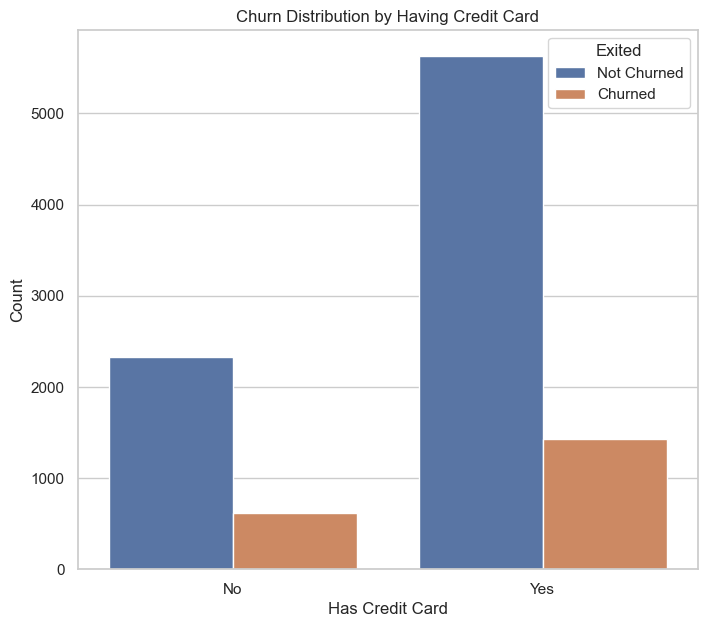

In [332]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Churn Distribution by Having Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Set x-axis labels as 'No' and 'Yes'
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


In [333]:
# Calculate churn percentages by HasCrCard
churn_percentage_by_card = df.groupby('HasCrCard')['Exited'].mean() * 100

# Display churn percentage by HasCrCard
print("Churn Percentage by Having Credit Card:")
print(churn_percentage_by_card)

Churn Percentage by Having Credit Card:
HasCrCard
0   20.8149
1   20.1984
Name: Exited, dtype: float64


**Insight:** The presence or absence of a credit card does not significantly affect whether a person churns or remains with the bank.

In [334]:
df['Satisfaction Score'].unique()

array([2, 3, 5, 4, 1], dtype=int64)

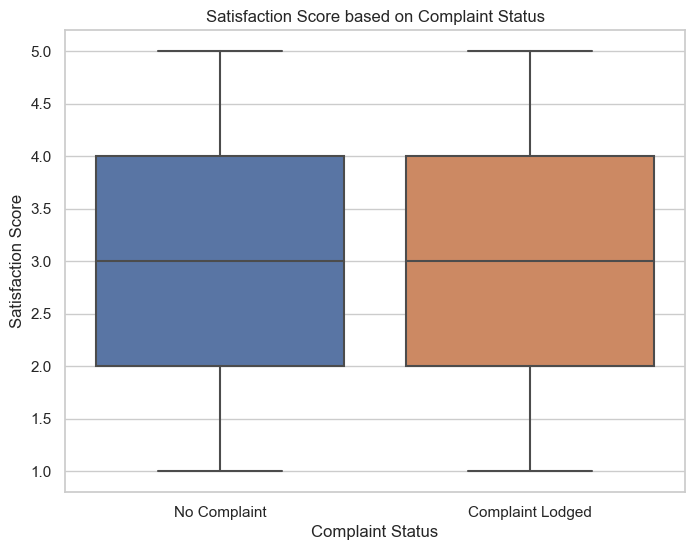

In [335]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Complain', y='Satisfaction Score')
plt.title('Satisfaction Score based on Complaint Status')
plt.xlabel('Complaint Status')
plt.ylabel('Satisfaction Score')
plt.xticks(ticks=[0, 1], labels=['No Complaint', 'Complaint Lodged'])  # Set x-axis labels
plt.show()


**Insight:** The satisfaction scores for customers who lodged a complaint and those who did not are similar, indicating a consistent level of satisfaction with the resolution of issues regardless of complaint status.

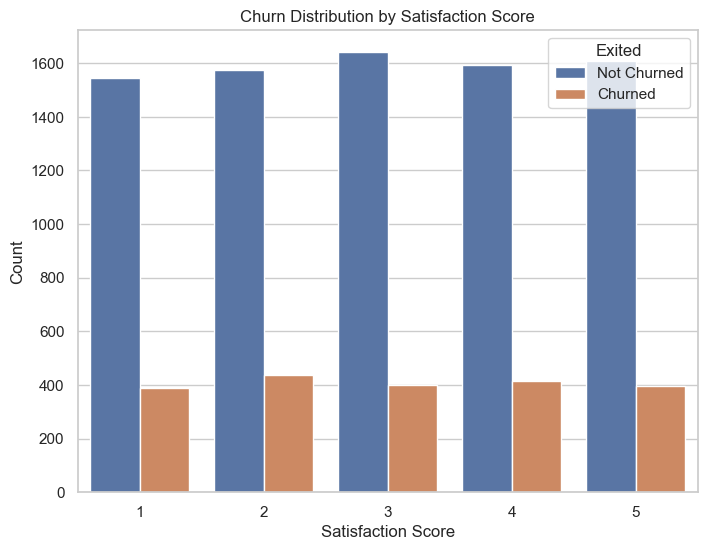

In [336]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Satisfaction Score', hue='Exited', order=[1, 2, 3, 4, 5])
plt.title('Churn Distribution by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** There appears to be no significant correlation between satisfaction scores and customer churn. Higher satisfaction scores do not seem to have a discernible impact on reducing churn rates.

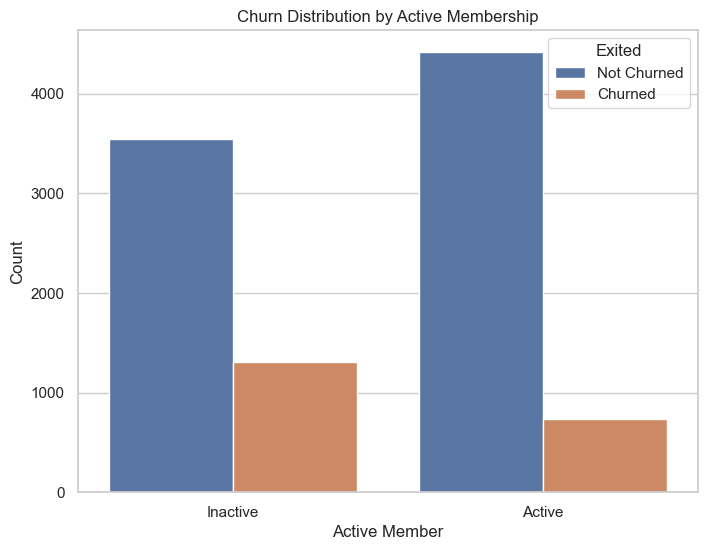

In [337]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Churn Distribution by Active Membership')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # Set x-axis labels
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** Active members tend to have a higher likelihood of staying (not churning) compared to inactive members.


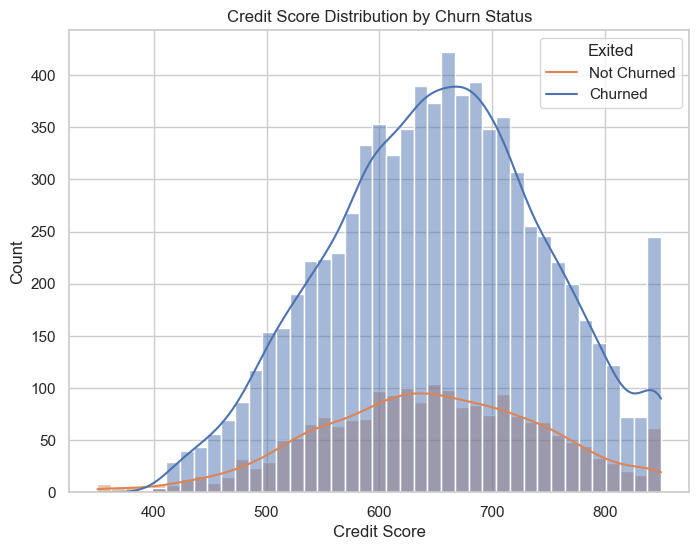

In [338]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insight:** 
- Customers with lower credit scores (400-500 range) show a higher tendency to churn, indicating a likelihood for churn among this group.
- Conversely, customers with higher credit scores (700-800 range) exhibit a greater tendency to stay with the service, suggesting higher retention rates among this cohort.

#### Age vs. Credit Score and Churn

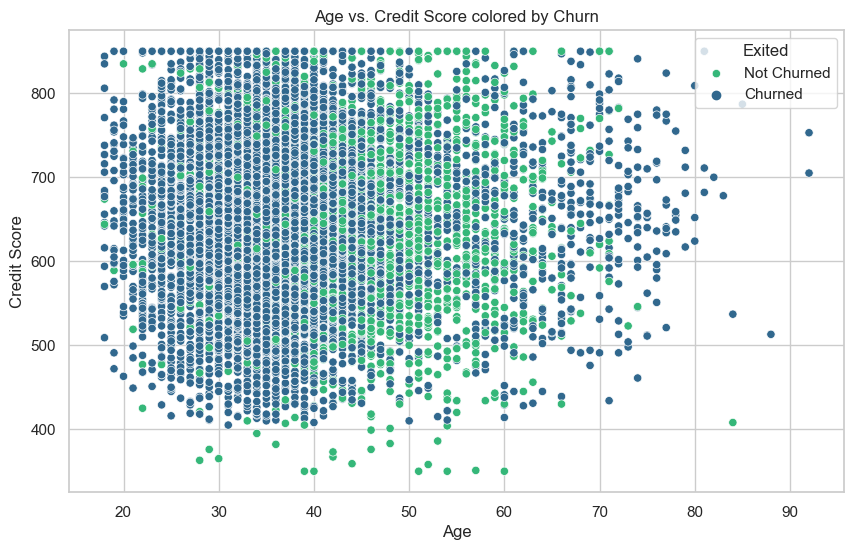

In [339]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Age vs. Credit Score colored by Churn')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insights:**
- Age positively correlates with credit score, indicating older customers tend to have higher credit scores, attributed to their longer credit history and financial decisions over time.
- Higher credit scores are associated with lower churn rates, reflecting greater financial stability among customers.
- A cluster of churned customers is observed in the lower-left corner, likely younger individuals with lower credit scores, potentially facing financial constraints leading to a higher likelihood of churn.

#### Estimated Salary vs. Credit Score and Churn

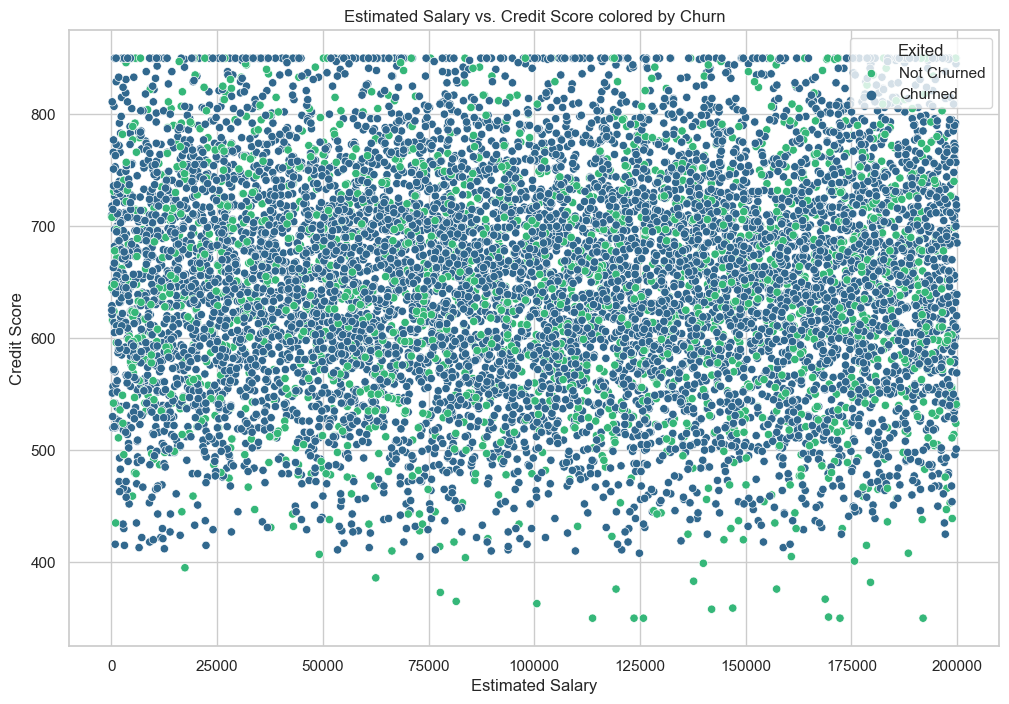

In [340]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='EstimatedSalary', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Estimated Salary vs. Credit Score colored by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

**Insights:**
- Weak positive correlation between estimated salary and credit score: Higher estimated salaries slightly correlate with higher credit scores, but exceptions exist with low credit scores despite high salaries.
- Higher credit scores associate with lower churn likelihood: Customers with better credit profiles tend to exhibit more financial stability, reducing the probability of service cancellations due to financial constraints.
- No clear pattern in churn behavior: Churned customers exhibit no identifiable trend regarding estimated salary or credit score, indicating no direct relationship between these factors and churn propensity.

#### Balance vs. Credit Score and Churn

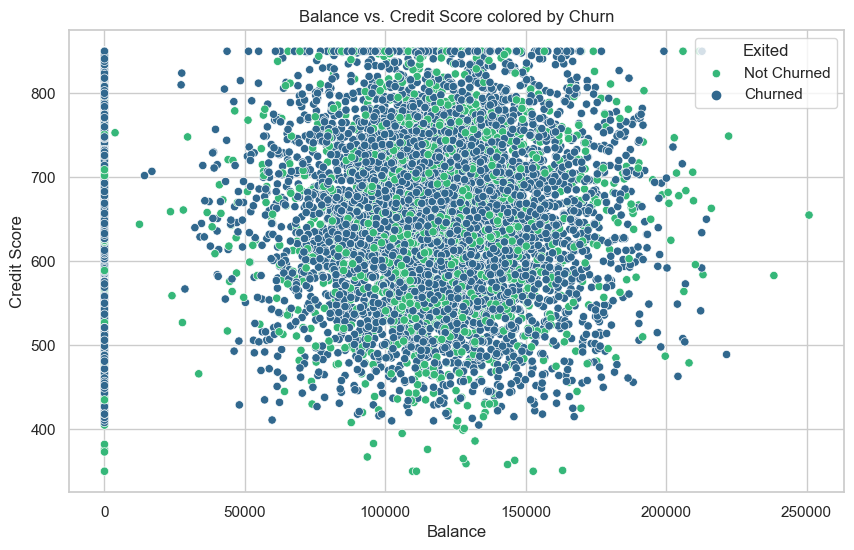

In [341]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='CreditScore', hue='Exited', palette='viridis')
plt.title('Balance vs. Credit Score colored by Churn')
plt.xlabel('Balance')
plt.ylabel('Credit Score')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()


**Insights:**
- Negative correlation: Higher account balances tend to correspond with lower credit scores, possibly indicating higher debt impacting credit scores.
- Credit score impact on churn: Favorable credit profiles are linked to lower churn rates, reflecting greater financial stability.
- Churned customer cluster: Lower-right plot cluster represents customers with high balances and low credit scores, potentially facing financial strain leading to higher churn likelihood.

<a id="4"></a> <br>
## Step 4: Data Preparation

In [342]:
cat_col

Index(['Geography', 'Gender', 'Card Type'], dtype='object')

In [343]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(df[cat_col], drop_first = True)
dummies.shape

(10000, 6)

In [344]:
# Add the results to the original dataframe

df = pd.concat([df, dummies], axis = 1)

In [345]:
# Drop the original cat variables as dummies are already created

df.drop(cat_col, axis = 1, inplace = True)
df.shape

(10000, 18)

In [346]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.0000,1,1,1,101348.8800,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,5,425,0,1,0,1,0,0


### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [347]:
#from sklearn.preprocessing import StandardScaler

#num_columns_list = num_col.tolist()
#num_columns_list.remove("Exited")
#num_col = pd.Index(num_columns_list)
#numerical_columns = num_col

#scaler = StandardScaler()
#scaler.fit(df[numerical_columns])
#df[numerical_columns] = scaler.transform(df[numerical_columns])


In [348]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.0000,1,1,1,101348.8800,1,1,2,464,0,0,0,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,1,3,456,0,1,0,0,0,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,1,3,377,0,0,0,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,5,350,0,0,0,1,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,5,425,0,1,0,1,0,0


In [349]:
df.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_Germany       uint8
Geography_Spain         uint8
Gender_Male             uint8
Card Type_GOLD          uint8
Card Type_PLATINUM      uint8
Card Type_SILVER        uint8
dtype: object

In [350]:
df["Exited"].unique()

array([1, 0], dtype=int64)

<a id="5"></a> <br>
## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

### Dividing into X and Y sets for the model building

In [351]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

In [352]:
y.dtypes

dtype('int64')

In [353]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 80/20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=0)

In [354]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((8000, 17), (2000, 17), (8000,), (2000,))

In [355]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
7389,667,34,5,0.0000,2,1,0,163830.6400,0,5,627,0,1,0,0,0,0
9275,427,42,1,75681.5200,1,1,1,57098.0000,0,5,418,1,0,1,0,0,1
2995,535,29,2,112367.3400,1,1,0,185630.7600,0,2,989,0,0,0,0,1,0
5316,654,40,5,105683.6300,1,1,0,173617.0900,0,5,250,0,1,1,0,0,0
356,850,57,8,126776.3000,2,1,1,132298.4900,0,3,244,0,1,0,1,0,0


In [356]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0000,650.5500,97.0094,350.0000,583.0000,652.0000,718.0000,850.0000
Age,8000.0000,38.8546,10.4495,18.0000,32.0000,37.0000,44.0000,88.0000
Tenure,8000.0000,4.9807,2.8901,0.0000,2.0000,5.0000,7.0000,10.0000
Balance,8000.0000,76076.5042,62581.3647,0.0000,0.0000,96870.1700,127540.8650,238387.5600
NumOfProducts,8000.0000,1.5324,0.5777,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,8000.0000,0.7077,0.4548,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,8000.0000,0.5159,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,8000.0000,100172.2827,57538.4261,11.5800,51270.6975,100319.8400,149618.3900,199992.4800
Complain,8000.0000,0.2050,0.4037,0.0000,0.0000,0.0000,0.0000,1.0000
Satisfaction Score,8000.0000,3.0114,1.3982,1.0000,2.0000,3.0000,4.0000,5.0000


In [357]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
CreditScore,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0268,-0.0270,-0.0126,0.0001,0.0055,0.0048,-0.0029,0.0108,-0.0136,-0.0005
Age,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853,0.2835,-0.0009,0.0022,0.0469,-0.0017,-0.0275,0.0009,0.0047,-0.0095
Tenure,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0137,-0.0130,0.0087,-0.0102,-0.0006,0.0039,0.0147,0.0123,-0.0188,0.0072
Balance,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1186,0.1191,-0.0026,0.0146,0.4011,-0.1349,0.0121,0.0019,-0.0073,-0.0191
NumOfProducts,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0476,-0.0464,-0.0114,-0.0153,-0.0104,0.0090,-0.0219,-0.0086,0.0207,0.0066
HasCrCard,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0070,-0.0071,-0.0002,-0.0110,0.0106,-0.0135,0.0058,-0.0133,0.0019,0.0081
IsActiveMember,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1564,-0.1547,0.0102,-0.0050,-0.0205,0.0167,0.0225,0.0112,0.0041,0.0075
EstimatedSalary,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0125,0.0125,-0.0137,-0.0015,0.0103,-0.0065,-0.0081,0.0046,0.0011,0.0101
Exited,-0.0268,0.2853,-0.0137,0.1186,-0.0476,-0.0070,-0.1564,0.0125,1.0000,0.9957,-0.0058,-0.0046,0.1733,-0.0528,-0.1063,-0.0160,-0.0003,-0.0038
Complain,-0.0270,0.2835,-0.0130,0.1191,-0.0464,-0.0071,-0.1547,0.0125,0.9957,1.0000,-0.0048,-0.0029,0.1751,-0.0536,-0.1063,-0.0157,0.0006,-0.0047


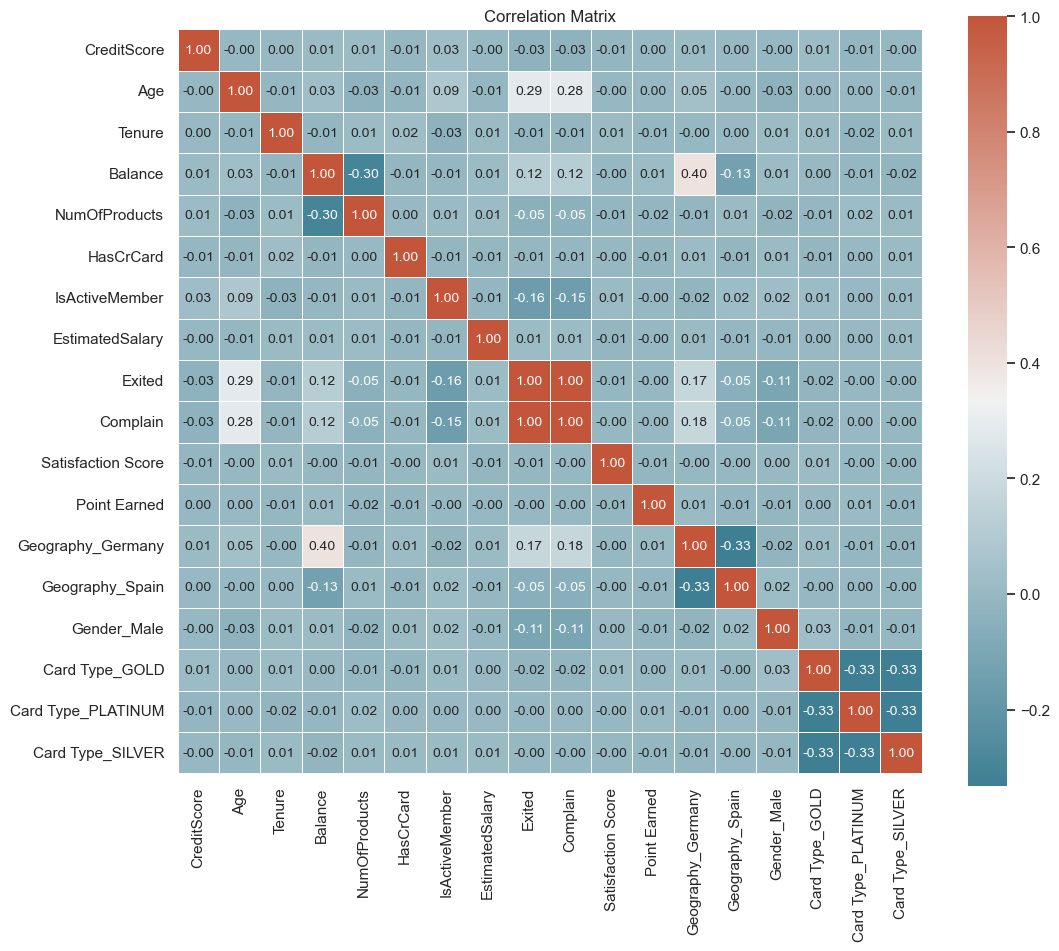

In [358]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(12, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 10}, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Grid SearchV

In [359]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


# Define the XGBoost regressor
xgb_model = XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'eta0': [0.0, 0.5, 1],
    'max_depth': [3, 5, 7],
    'power_t':  [0.25, 0.5, 2],
    'random_state' : [42, 20, 101, 8]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, )

# Perform grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'eta0': [0.0, 0.5, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'power_t': [0.25, 0.5, 2],
                         'random_state': [42, 20, 101, 8]})

In [360]:
# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best parameters found: {'eta0': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'power_t': 0.25, 'random_state': 42}
Best Score: 0.9880222216416261


## Handeling imbalanced Data

In [361]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [362]:
pd.DataFrame(y_train).value_counts()

Exited
0         6367
1         1633
dtype: int64

In [363]:
X_smote_tr, y_smote_tr = smote.fit_resample(X_train, y_train)
X_smote_tr.shape, y_smote_tr.shape

((12734, 17), (12734,))

In [364]:
pd.DataFrame(y_smote_tr).value_counts()

Exited
0         6367
1         6367
dtype: int64

In [365]:
#scaling the train and test datasets for SMOTE

sc_smote = StandardScaler()
X_smote_tr = sc_smote.fit_transform(X_smote_tr)
X_smote_te = sc_smote.transform(X_test)

<a id="6"></a> <br>
## Step 6: Using Various Models

Model: Logistic Regression
Cross-validation scores: [0.79002625 0.84776903 0.85183796]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      1607
           1       0.43      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Accuracy Score: 0.798
Confusion Matrix:
 [[1564   43]
 [ 361   32]]


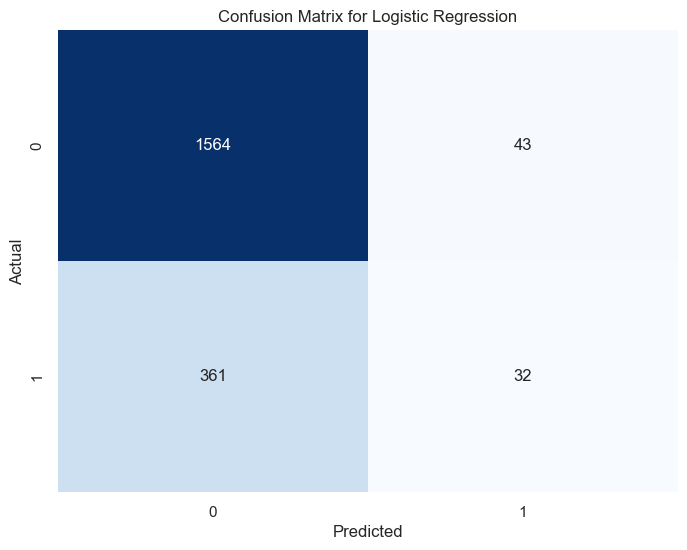

---------------------------------------------------

Model: SVM
Cross-validation scores: [0.79452568 0.79415073 0.79444861]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Accuracy Score: 0.8035
Confusion Matrix:
 [[1607    0]
 [ 393    0]]


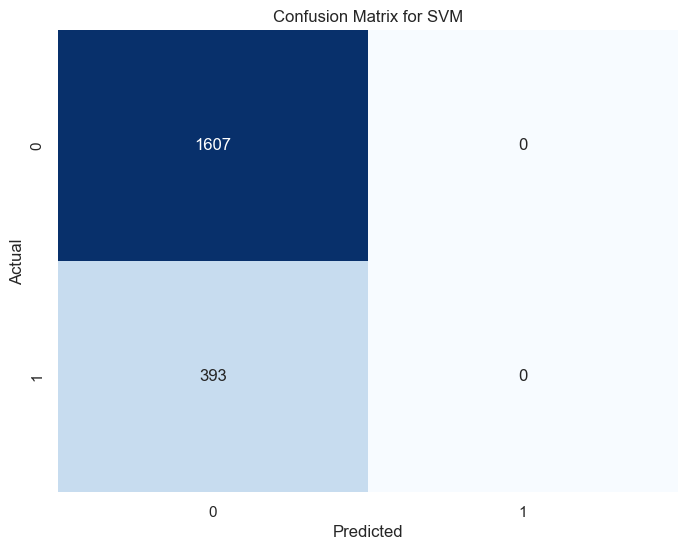

---------------------------------------------------

Model: KNN
Cross-validation scores: [0.7607799  0.76452943 0.76406602]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      1607
           1       0.24      0.09      0.13       393

    accuracy                           0.77      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.70      0.77      0.72      2000

Accuracy Score: 0.765
Confusion Matrix:
 [[1494  113]
 [ 357   36]]


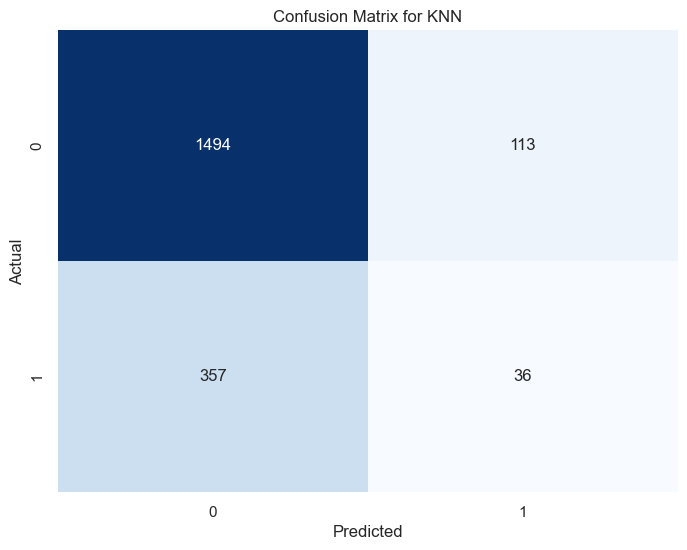

---------------------------------------------------

Model: Random Forest
Cross-validation scores: [0.99850019 0.99850019 0.99849962]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy Score: 0.999
Confusion Matrix:
 [[1606    1]
 [   1  392]]


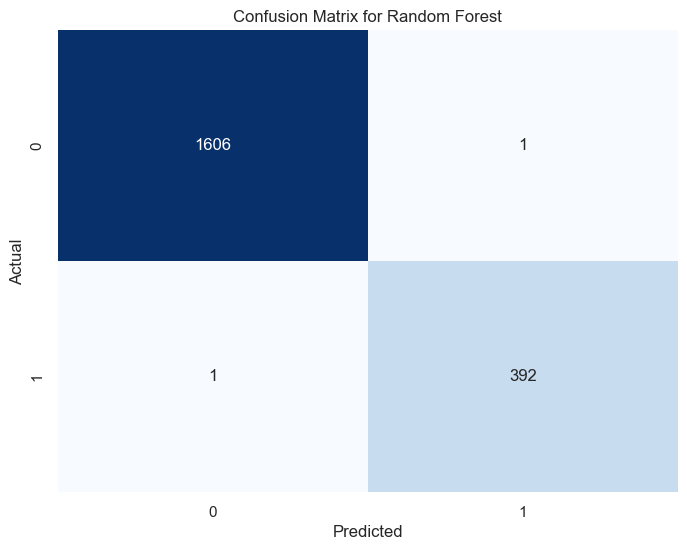

---------------------------------------------------



In [375]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier() 
}

for model_name, model in models.items():
    print("Model:", model_name)
    
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3)
    print("Cross-validation scores:", scores)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy)
    
    # Print the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    
    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for " + model_name)
    plt.show()
    
    print("---------------------------------------------------\n")
